## Oppgave 11

In [93]:
import pandas as pd

df = pd.read_csv('oppgave11.csv', sep=';')
df['dato'] = pd.to_datetime(df['dato'], format='%d.%m.%Y', errors='coerce')
df.head()

,dato,type,beløp (kr),kommentar
0,2023-03-29,mat,854,kiwi
1,2023-03-28,mat,1044,kiwi
2,2023-03-25,mat,1206,oda
3,2023-03-23,mat,954,meny
4,2023-03-22,mat,367,rema1000


### a)

In [126]:
oversikt = df.groupby(df['type']).sum()
oversikt

,beløp (kr)
type,
mat,28080
strøm,16520


### b)

In [95]:
mnd = df.groupby(df['dato'].dt.strftime('%B')).sum()
mnd

,beløp (kr)
dato,
February,14571
January,17001
March,13028


In [127]:
mnd2 = df.groupby(pd.Grouper(key='dato', freq='1M')).sum()
mnd2.index = mnd2.index.strftime('%B') 
mnd2

,beløp (kr)
dato,
January,17001
February,14571
March,13028


<AxesSubplot:xlabel='dato'>

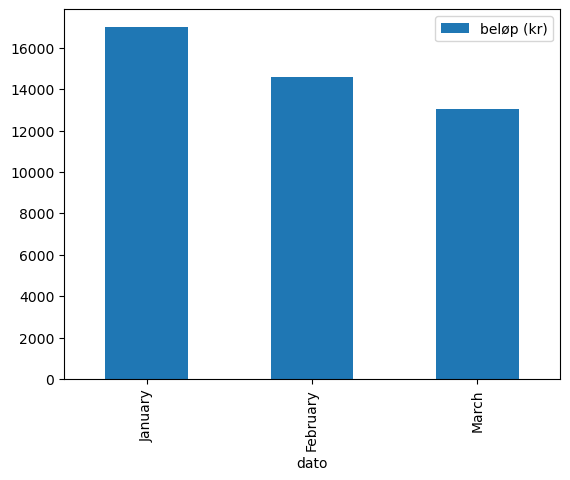

In [129]:
mnd2.plot.bar()

<AxesSubplot:xlabel='dato'>

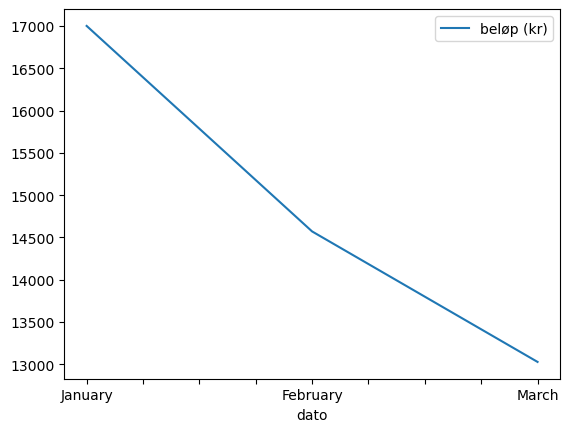

In [130]:
mnd2.plot()

In [136]:
def vis_mnd_oversikt():
    mnd2 = df.groupby(pd.Grouper(key='dato', freq='1M')).sum()
    mnd2.index = mnd2.index.strftime('%B') 
    print(mnd2)
    mnd2.plot.bar()

       beløp (kr)
type             
mat      43461.12
strøm    16520.00
          beløp (kr)
dato                
January     17001.00
February    14571.00
March       13028.00
April       15381.12
       beløp (kr)
type             
mat      56024.64
strøm    16520.00
          beløp (kr)
dato                
January     17001.00
February    14571.00
March       13028.00
April       15381.12
May         12563.52


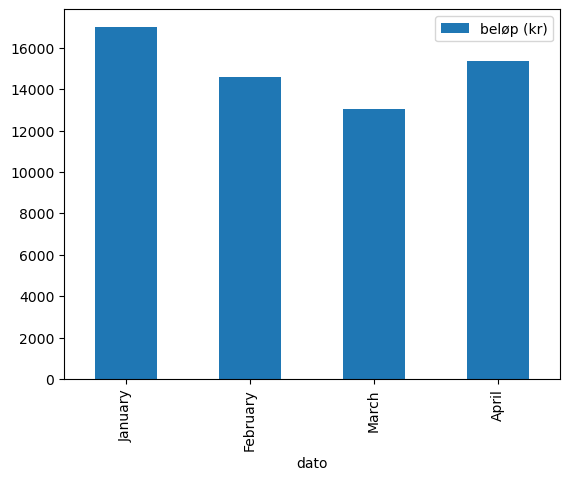

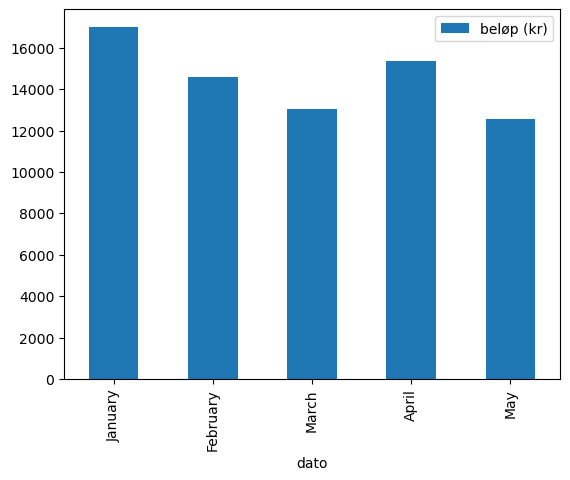

In [138]:
def legg_til_post(dato, typ, beløp, kommentar):
    dato = pd.to_datetime(dato, format='%d.%m.%Y', errors='coerce')
    df.loc[len(df)] = [dato, typ, beløp, kommentar]
    
    
    print(df.groupby(df['type']).sum())
    vis_mnd_oversikt()
    
legg_til_post('01.04.2023', 'mat', 2563.52, 'kiwi')
legg_til_post('01.05.2023', 'mat', 12563.52, 'kiwi')

## Oppgave 12

In [145]:
class Person():
  """
  Klasse for å lage person-objekter.

  Parametre:
  navn (str):      Personens navn
  """
  def __init__(self,navn):
    """
    Konstruktør
    """
    self.navn = navn
    self.gift = False   # Settes til True når personen gifter seg
    self.ektefelle = {} # Kobles til annet objekt når personen gifter seg

  def visStatus(self):
    if self.gift:
      print(f"Jeg er gift med {self.ektefelle.navn}.")
    else:
      print("Jeg er singel.")

  def gifteMeg(self,ektefelleObjekt):
    if self.gift:
      print(f"Beklager {ektefelleObjekt.navn}. Jeg er allerede gift med {self.ektefelle.navn}.")
    elif ektefelleObjekt.gift:
      print(f"{ektefelleObjekt.navn} er allerede gift med {ektefelleObjekt.ektefelle.navn}.")
    else:
      self.ektefelle = ektefelleObjekt
      self.gift = True
      ektefelleObjekt.gift = True

def hovedprogram():
  brad = Person("Brad Pitt")
  brad.visStatus()    # Jeg er singel.

  angie = Person("Angelina Jolie")
  brad.gifteMeg(angie)
  brad.visStatus()    # Jeg er gift med Angelina Jolie.

  jo = Person("Jo By")
  brad.gifteMeg(jo)   # Beklager Jo By. Jeg er allerede gift med Angelina Jolie.

  jo.gifteMeg(brad)   # Brad Pitt er dessverre allerde gift med Angelina Jolie.
  jo.visStatus()      # Jeg er singel.


# Funksjonskall
hovedprogram()

Jeg er singel.
Jeg er gift med Angelina Jolie.
Beklager Jo By. Jeg er allerede gift med Angelina Jolie.
Brad Pitt er allerede gift med Angelina Jolie.
Jeg er singel.


In [147]:
"in" in "find"

True